# K-Nearest Neighbors (K-NN)

## Importing the dataset

In [5]:
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[3:5]
head(dataset)

Age,EstimatedSalary,Purchased
19,19000,0
35,20000,0
26,43000,0
27,57000,0
19,76000,0
27,58000,0


## Encoding the target feature as factor

In [6]:
dataset$Purchased = factor(dataset$Purchased, levels=c(0, 1))
head(dataset)

Age,EstimatedSalary,Purchased
19,19000,0
35,20000,0
26,43000,0
27,57000,0
19,76000,0
27,58000,0


## Splitting the dataset into the Training set and Test set

In [7]:
library(caTools)
set.seed(123)

split = sample.split(dataset$Purchased, SplitRatio=0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

Warning message:
"package 'caTools' was built under R version 3.6.3"

## Feature Scaling

In [8]:
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

In [9]:
head(training_set)

,Age,EstimatedSalary,Purchased
1,-1.7655475,-1.4733414,0
3,-1.0962966,-0.7883761,0
6,-1.0006894,-0.3602727,0
7,-1.0006894,0.3817730,0
8,-0.5226531,2.2654277,1
10,-0.2358313,-0.1604912,0


In [10]:
head(test_set)

,Age,EstimatedSalary,Purchased
2,-0.3041906,-1.5135434,0
4,-1.0599437,-0.3245603,0
5,-1.8156969,0.2859986,0
9,-1.2488820,-1.0957926,0
12,-1.1544129,-0.4852337,0
18,0.6405008,-1.3207353,1


## Fitting K-NN to the Training set and Predicting the Test set results

In [11]:
library(class)

y_pred = knn(train=training_set[, -3],
             test=test_set[, -3],
             cl=training_set[, 3],
             k=5,
             prob=TRUE)

In [17]:
head(data.frame(y_test=test_set[3], y_pred=y_pred))

,Purchased,y_pred
2,0,0
4,0,0
5,0,0
9,0,0
12,0,0
18,1,1


## Making the Confusion Matrix

In [20]:
cm = table(test_set[, 3], y_pred)
cm

   y_pred
     0  1
  0 59  5
  1  6 30

## Visualising the Training set results

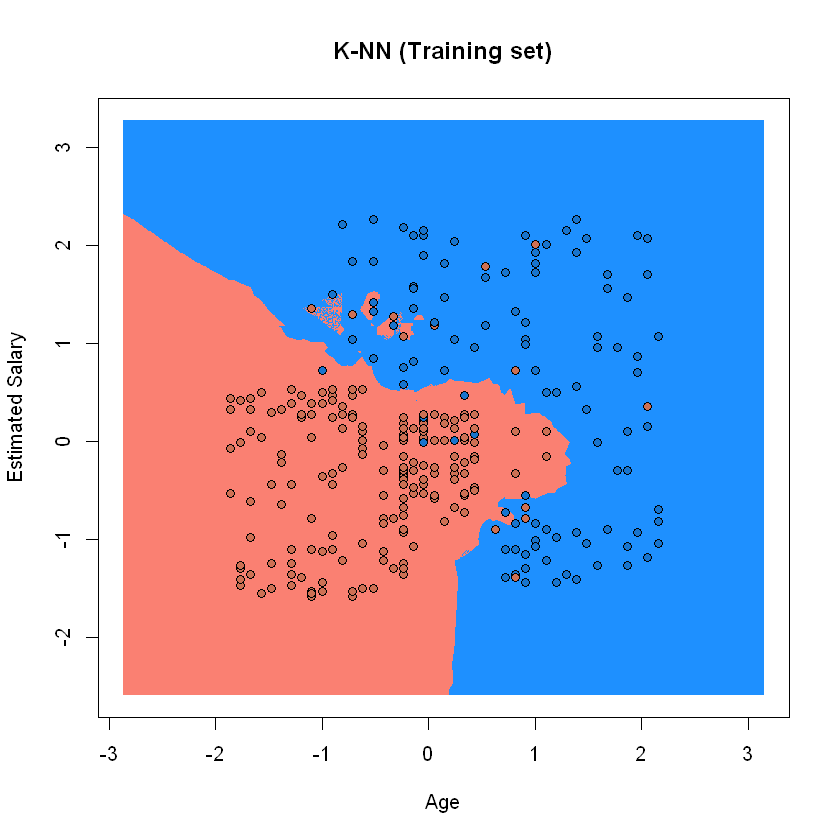

In [23]:
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by=0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by=0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set)=c('Age', 'EstimatedSalary')
y_grid = knn(train=training_set[, -3], test=grid_set, cl=training_set[, 3], k=5)

plot(set[, -3],
     main='K-NN (Training set)',
     xlab='Age', ylab='Estimated Salary',
     xlim=range(X1), ylim=range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add=TRUE)
points(grid_set, pch='.', col=ifelse(y_grid == 1, 'dodgerblue', 'salmon'))
points(set, pch=21, bg=ifelse(set[, 3] == 1, 'dodgerblue3', 'salmon3'))

## Visualising the Test set results

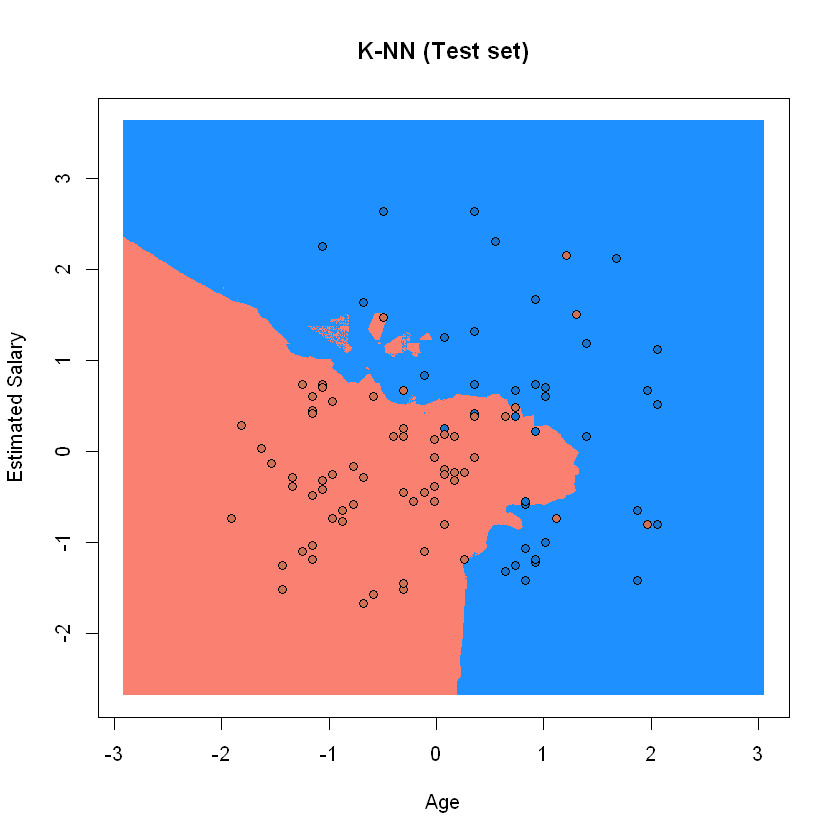

In [24]:
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by=0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by=0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set)=c('Age', 'EstimatedSalary')
y_grid = knn(train=training_set[, -3], test=grid_set, cl=training_set[, 3], k=5)

plot(set[, -3],
     main='K-NN (Test set)',
     xlab='Age', ylab='Estimated Salary',
     xlim=range(X1), ylim=range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add=TRUE)
points(grid_set, pch='.', col=ifelse(y_grid == 1, 'dodgerblue', 'salmon'))
points(set, pch=21, bg=ifelse(set[, 3] == 1, 'dodgerblue3', 'salmon3'))